## TASYA SALSABILA (1301184106)


In [50]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [51]:
cd '/content/gdrive/My Drive'

/content/gdrive/My Drive


In [52]:
ls

'04. Step 2 Memahami Fungsi Bisnis; Step 3 Prinsip Desain UI-VRE.gslides'
 1301184106_IF4311_PR4.pdf
 1301184106_Logmat_IF-42-02.pdf
'1301184106_PR7(1).pdf'
'1301184106_PR MINGGU 9_IF4311.pdf'
'1301184106 Registrasi | Telkom University.pdf'
 1475626298336.jpg
'2021-06-22 14-27-52.mp4'
'2021-06-28 21-02-13.mp4'
'2022-04-05 23-31-06.mp4'
'2022-04-06 09-35-19.mp4'
 Age_of_Empires_II_Win_RIP_EN.zip
'AHM_2022_0329_TASYA SALSABILA_GBR_ORANG.pdf'
'AHM_2022_0329_TASYA SALSABILA_GBR_POHON.pdf'
 AJS/
 apotek.rar
'bandicam 2022-01-20 22-39-27-063.mp4'
 best_model.h5
'Biodata Juri_Akbar Zamil_Paskibra.pdf'
'Biodata Juri_Bathara Saverigadi_Tari Tradisional.pdf'
'Biodata Juri_Irman Heryana_Paskibra.pdf'
'Biodata Juri_Mila Rosinta Totoatmojo_Tari Tradisional.pdf'
 bottleneck_fc_model.h5
'bottleneck_features_test (1).npy'
 bottleneck_features_test.npy
'bottleneck_features_train (1).npy'
 bottleneck_features_train.npy
'bottleneck_features_validation (1).npy'
 bottleneck_features_validation.npy
'Bulukum

In [53]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import img_to_array
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense,AveragePooling2D
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import math  
import datetime
import time
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import os
import tensorflow as tf

print('Tensorflow_VER= V',tf.version.VERSION)
print(confusion_matrix)

Tensorflow_VER= V 2.9.2
<function confusion_matrix at 0x7fbe0730cd30>


In [54]:
train_data_dir = '/content/gdrive/My Drive/train/'  
test_data_dir = '/content/gdrive/My Drive/test/'
validation_data_dir = '/content/gdrive/My Drive/val/'  

#TUNING SEBAGIAN DISINI
batch_size = 16
lr=1e-4
opt='rmsprop'

In [55]:
#Feature Extraction cuy
img_width, img_height = 224, 224  
   
top_model_weights_path = 'bottleneck_fc_model.h5' 

epochs = 100 
  

resnet50 = applications.ResNet50(include_top=False, weights='imagenet') 
resnet50.summary() #Arsitekturnya Wan

datagen = ImageDataGenerator(rescale=1. / 255)  
train_datagen = ImageDataGenerator(#rescale=1. / 255) 
        rescale=1. / 255,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True)    
#

#Pre train Training
start = datetime.datetime.now()
   
train_generator = train_datagen.flow_from_directory(  
      train_data_dir,  
      target_size=(img_width, img_height),  
      batch_size=batch_size,  
      class_mode=None,  
      shuffle=False)  
   
nb_train_samples = len(train_generator.filenames)  
num_classes = len(train_generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
   
bottleneck_features_train = resnet50.predict_generator(train_generator, predict_size_train)  
   
np.save('/content/gdrive/My Drive/bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

#Pre-train Validation cuy
start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
      validation_data_dir,  
      target_size=(img_width, img_height),  
      batch_size=batch_size,  
      class_mode=None,  
      shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  

predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = resnet50.predict_generator(  
      generator, predict_size_validation)  
   
np.save('/content/gdrive/My Drive/bottleneck_features_validation.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

#Pre train Testing
start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
      test_data_dir,  
      target_size=(img_width, img_height),  
      batch_size=batch_size,  
      class_mode=None,  
      shuffle=False)  
   
nb_test_samples = len(generator.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size))  
   
bottleneck_features_test = resnet50.predict_generator(  
      generator, predict_size_test)  
   
np.save('/content/gdrive/My Drive/bottleneck_features_test.npy', bottleneck_features_test) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_7[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

<ipython-input-55-2c1a80875890>:35: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_train = resnet50.predict_generator(train_generator, predict_size_train)
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Time:  0:00:55.205505
Found 445 images belonging to 27 classes.


<ipython-input-55-2c1a80875890>:56: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_validation = resnet50.predict_generator(


Time:  0:01:22.499041
Found 445 images belonging to 27 classes.


<ipython-input-55-2c1a80875890>:77: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_test = resnet50.predict_generator(


Time:  0:01:22.405571


Found 445 images belonging to 27 classes.
Found 445 images belonging to 27 classes.


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)



Epoch 1: val_acc improved from -inf to 0.17528, saving model to /content/gdrive/My Drive/best_model.h5

Epoch 2: val_acc improved from 0.17528 to 0.27640, saving model to /content/gdrive/My Drive/best_model.h5

Epoch 3: val_acc did not improve from 0.27640

Epoch 4: val_acc did not improve from 0.27640

Epoch 5: val_acc did not improve from 0.27640

Epoch 6: val_acc did not improve from 0.27640

Epoch 7: val_acc did not improve from 0.27640

Epoch 8: val_acc did not improve from 0.27640

Epoch 9: val_acc did not improve from 0.27640

Epoch 10: val_acc did not improve from 0.27640
28/28 [==============================] - 0s 7ms/step - loss: 2.8211 - acc: 0.1730
[INFO] accuracy: 17.30%
[INFO] Loss: 2.821132183074951
Time:  0:00:08.494091
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 100352)            0         
                                 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Halal       0.00      0.00      0.00        10
       Haram       0.00      0.00      0.00         6
   meragukan       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        11
           6       0.77      0.26      0.38       117
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00        29
           9       0.00      0.00      0.00        27
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00        17
          15       1.00      0.04      0.07        27
          16       0.60      0.12      0.21        24
          17       0.00      0.00      0.00        27
          18       0.00    

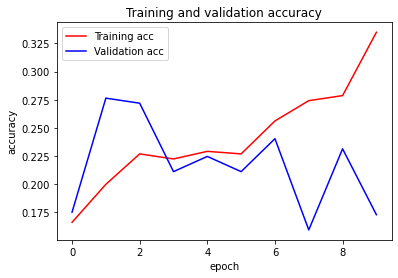

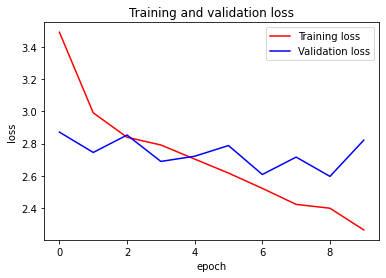

In [56]:
#TRAINING dan Testing
from sklearn.metrics import confusion_matrix
#TRAINING
#hasil= []
#resnet50 = applications.resnet50(include_top=False, weights='imagenet') 
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(224, 224))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("confusion matrix yang dinormalisasi \n\n\n")
    else:
        print('Confusion matrix tanpa normalisasi \n\n\n')
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


img_width, img_height = 224, 224  
top_model_weights_path = 'bottleneck_fc_model.h5' 

datagen = ImageDataGenerator(rescale=1. / 255) 
 
#training data
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
train_data = np.load('/content/gdrive/My Drive/bottleneck_features_train.npy')  

train_labels = generator_top.classes  
   
train_labels = to_categorical(train_labels, num_classes=num_classes) 

#testing data
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('/content/gdrive/My Drive/bottleneck_features_test.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)

#Lanjut training 
start = datetime.datetime.now()
model = Sequential()
#model.add(AveragePooling2D(pool_size=(7, 7)))
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(num_classes, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=lr),
              metrics=['acc'])  


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# history = model.fit(train_data, train_labels,  
#       epochs=20,
#       batch_size=batch_size,  
#       validation_data=(test_data, test_labels))


history = model.fit(train_data, train_labels,  
      epochs=10,
      batch_size=batch_size,  
      validation_data=(test_data, test_labels),
      verbose=0,
      callbacks=[es, mc])    

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 test_data, test_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

#Model summary
model.summary()

#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plotacc = plt.figure(1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plotacc.show()
plt.savefig("/content/gdrive/My Drive/train/Acc_resnet50_{}Batch_{}E_Opt={}_lr={}.jpg".format(batch_size, len(acc),opt,lr))



plotloss = plt.figure(2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plotloss.show()
plt.savefig("/content/gdrive/My Drive/train/Loss_resnet50_{}Batch_{}E_Opt={}_lr={}.jpg".format(batch_size, len(acc),opt,lr))

Evaluasi=model.evaluate(test_data, test_labels)
print(Evaluasi)


print('test data', test_data)
preds = np.round(model.predict(test_data),0) 
score = model.predict(test_data)
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
print('rounded test_labels', preds)
#Model di save 
model.save('/content/gdrive/My Drive/model_{}E.h5'.format(len(acc)))

view = ['Halal','Haram','meragukan','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27']
classification_metrics = metrics.classification_report(test_labels, preds, target_names=view )
print(classification_metrics)

#Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to return the column
# label of the maximum value thus creating a categorical variable
#Basically, flipping a dummy variable back to it's categorical variable
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

Confusion matrix tanpa normalisasi 



confusion matrix yang dinormalisasi 





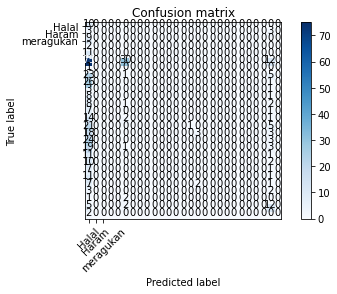

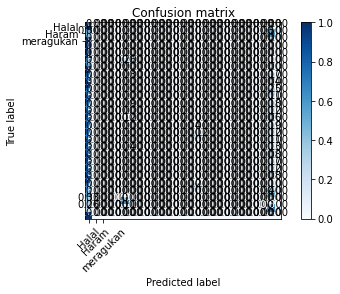

In [57]:
plotcmnn = plt.figure(3)    
plot_confusion_matrix(confusion_matrix, ['Halal','Haram','meragukan'])  
plt.savefig("/content/gdrive/My Drive/train/CMNN_resnet50_{}Batch_{}E_Opt={}_lr={}.jpg".format(batch_size, len(acc),opt,lr))

plotcmn = plt.figure(4) 
plot_confusion_matrix(confusion_matrix, ['Halal','Haram','meragukan'],normalize=True)
plt.savefig("/content/gdrive/My Drive/train/CMN_resnet50_{}Batch_{}E_Opt={}_lr={}.jpg".format(batch_size, len(acc),opt,lr))

In [58]:
#TESTING
from sklearn.metrics import confusion_matrix
#resnet50 = applications.resnet50(include_top=False, weights='imagenet')
 
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(224, 224))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("confusion matrix yang dinormalisasi \n\n\n")
    else:
        print('Confusion matrix tanpa normalisasi \n\n\n')
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def predict(path):
    view = ['Halal','Haram','meragukan','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27']
    images = read_image(path)
#    time.sleep(.5)
    bt_prediction = resnet50.predict(images)  
    preds = model.predict_proba(bt_prediction)
#    for idx, view, x in zip(range(0,6), view , preds[0]):
#        print("ID: {}, Label: {} {}%".format(idx, view, round(x*100,2) ))
#    print('Final Decision:')
#    time.sleep(.5)
#    for x in range(3):
#        print('.'*(x+1))
#        time.sleep(.2)
    class_predicted = model.predict_classes(bt_prediction)
    class_dictionary = generator_top.class_indices  
    inv_map = {v: k for k, v in class_dictionary.items()}  
#    print("ID: {}, Label: {}".format(class_predicted[0], inv_map[class_predicted[0]]))  
    return load_img(path)

img_width, img_height = 224, 224  
top_model_weights_path = 'bottleneck_fc_model.h5' 

  
datagen = ImageDataGenerator(rescale=1. / 255) 

#training data
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
train_data = np.load('/content/gdrive/My Drive/bottleneck_features_train.npy')  

train_labels = generator_top.classes  
   
train_labels = to_categorical(train_labels, num_classes=num_classes) 

#validation data
generator_top = datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('/content/gdrive/My Drive/bottleneck_features_validation.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

#testing data
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('/content/gdrive/My Drive/bottleneck_features_test.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)



 
model = tf.keras.models.load_model('/content/gdrive/My Drive/best_model.h5')
#model = tf.keras.models.load_model('/content/gdrive/My Drive/CODE/models/resnet50/model_36E.h5')
model.summary()

model.evaluate(validation_data, validation_labels)

print('validation data', validation_data)
preds = np.round(model.predict(validation_data),0) 
score = model.predict(validation_data)
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
print('rounded validation_labels', preds)

view = ['Halal','Haram','meragukan','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27']
classification_metrics = metrics.classification_report(validation_labels, preds, target_names=view )
print(classification_metrics)

categorical_validation_labels = pd.DataFrame(validation_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_validation_labels, categorical_preds)

Found 445 images belonging to 27 classes.
Found 445 images belonging to 27 classes.
Found 445 images belonging to 27 classes.
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 100352)            0         
                                                                 
 dense_9 (Dense)             (None, 27)                2709531   
                                                                 
Total params: 2,709,531
Trainable params: 2,709,531
Non-trainable params: 0
_________________________________________________________________
14/14 [==============================] - 0s 7ms/step - loss: 2.7448 - acc: 0.2764
validation data [[[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.9777522e+00
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.5806947e+00
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.00

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix tanpa normalisasi 





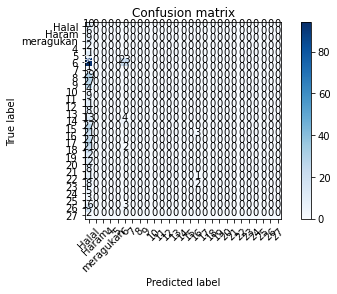

In [59]:
plotcmnn = plt.figure(5)    
plot_confusion_matrix(confusion_matrix, ['Halal','Haram','meragukan','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27'])
#plt.savefig("/content/gdrive/My Drive/CODE/gambar/resnet50/test/CMNN_resnet50_{}Batch_{}E_Opt={}_lr={}.jpg".format(batch_size, len(acc),opt,lr))

# plotcmn = plt.figure(6) 
# plot_confusion_matrix(confusion_matrix, ['FCV','LVOT' , 'RVOT' ,'TVT' ],normalize=True)
# # plt.savefig('gambar/resnet50/test/20e/CMN_resnet50_20E')
# plt.savefig('gambar/resnet50/test/50e/CMN_resnet50_50E')